Test Accuracy: 0.4842105263157895


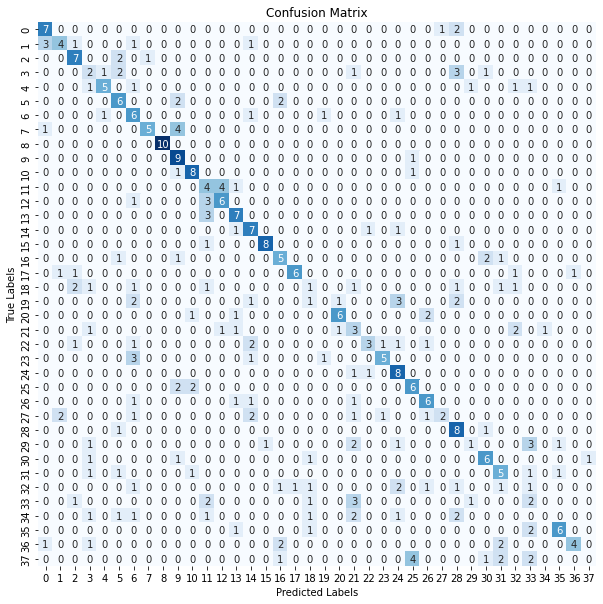

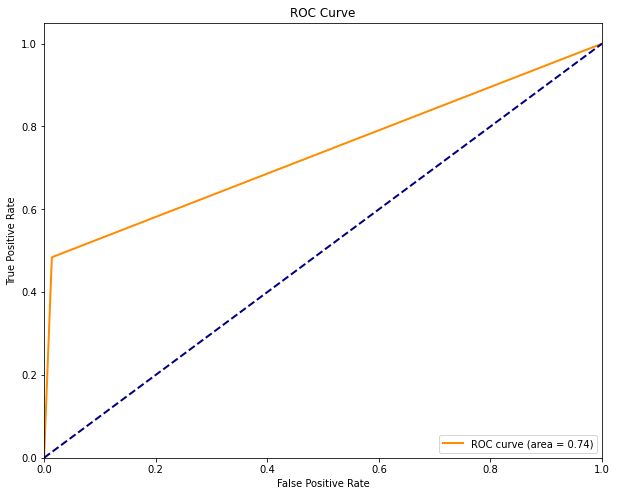

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define paths to your dataset
train_dir = "C:/Users/sajuv/OneDrive/Desktop/datasmall/train"
test_dir = "C:/Users/sajuv/OneDrive/Desktop/datasmall/test"

# Load images and labels
def load_data(directory):
    data = []
    labels = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            img_path = os.path.join(subdir, file)
            label = os.path.basename(subdir)
            data.append(img_path)
            labels.append(label)
    return data, labels

def extract_features(data):
    features = []
    for img_path in data:
        img = load_img(img_path, target_size=(256, 256))
        img_array = img_to_array(img)
        features.append(img_array.flatten())  # Flatten the image array as features
    return np.array(features)

train_data, train_labels = load_data(train_dir)
test_data, test_labels = load_data(test_dir)

# Extract features from images
train_features = extract_features(train_data)
test_features = extract_features(test_data)

# Initialize Random Forest Classifier
model = RandomForestClassifier(n_estimators=100)

# Train the model
model.fit(train_features, train_labels)

# Predict labels for test set
predicted_labels = model.predict(test_features)

# Calculate accuracy
accuracy = np.mean(predicted_labels == test_labels)
print("Test Accuracy:", accuracy)

# # Plot confusion matrix
# conf_matrix = confusion_matrix(test_labels, predicted_labels)
# plt.figure(figsize=(10, 10))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

# Plot ROC curve
lb = LabelBinarizer()
test_labels_bin = lb.fit_transform(test_labels)
predicted_labels_bin = lb.transform(predicted_labels)

fpr, tpr, _ = roc_curve(test_labels_bin.ravel(), predicted_labels_bin.ravel())
roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(10, 8))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc="lower right")
# plt.show()


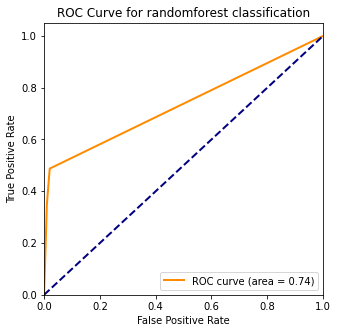

In [41]:
# Plot ROC curve
lb = LabelBinarizer()
test_labels_bin = lb.fit_transform(test_labels)
predicted_labels_bin = lb.transform(predicted_labels)

fpr, tpr, _ = roc_curve(test_labels_bin.ravel(), predicted_labels_bin.ravel())
roc_auc = auc(fpr, tpr)

interp_tpr = np.interp(np.linspace(0, 1, 100), fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(np.linspace(0, 1, 100), interp_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for randomforest classification')
plt.legend(loc="lower right")
plt.show()


# plt.plot(fpr["macro"], tpr["macro"],
#          label='Macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=lw)
# plt.plot([0, 1], [0, 1], 'k--', lw=lw)


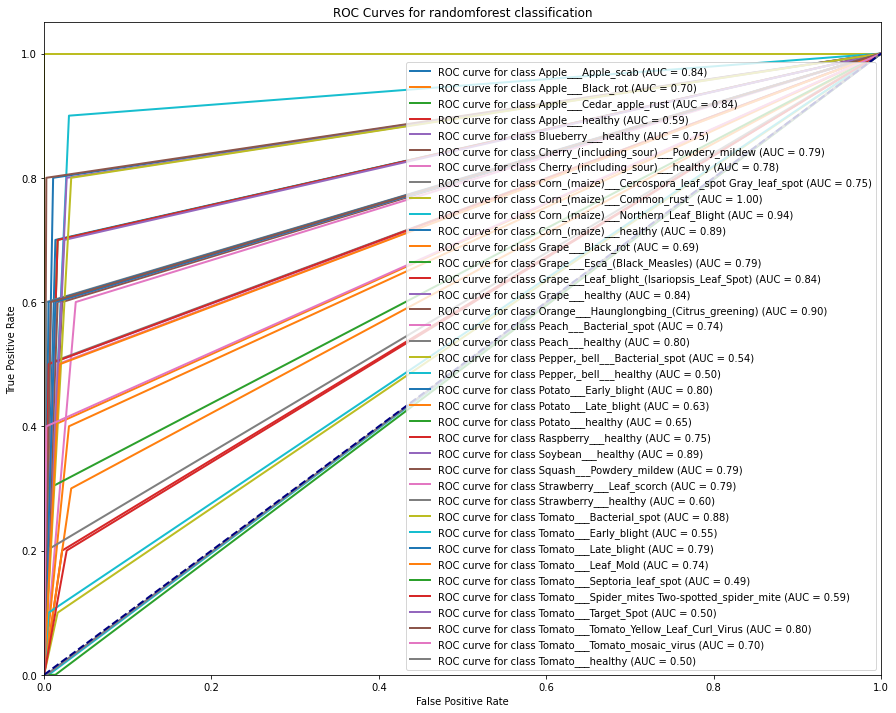

In [22]:
# Plot ROC curves for each class
lb = LabelBinarizer()
test_labels_bin = lb.fit_transform(test_labels)
predicted_labels_bin = lb.transform(predicted_labels)

class_names = lb.classes_
plt.figure(figsize=(15, 12))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(test_labels_bin[:, i], predicted_labels_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve for class {} (AUC = {:.2f})'.format(class_names[i], roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for randomforest classification')
plt.legend(loc="lower right")
plt.show()

In [21]:
# Print classification report
from sklearn.metrics import classification_report

print("Test Accuracy:", accuracy)

print("\n")

class_names = np.unique(test_labels)
print("Classification Report:")
print(classification_report(test_labels, predicted_labels, target_names=class_names))


Test Accuracy: 0.4842105263157895


Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.58      0.70      0.64        10
                                 Apple___Black_rot       0.57      0.40      0.47        10
                          Apple___Cedar_apple_rust       0.54      0.70      0.61        10
                                   Apple___healthy       0.20      0.20      0.20        10
                               Blueberry___healthy       0.71      0.50      0.59        10
          Cherry_(including_sour)___Powdery_mildew       0.43      0.60      0.50        10
                 Cherry_(including_sour)___healthy       0.30      0.60      0.40        10
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.83      0.50      0.62        10
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00        10
               Corn_